In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt #data visualization
import seaborn as sns # EDA
from collections import Counter
import warnings
warnings.filterwarnings('ignore')
#import plotly.graph_objs as go
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

['heart.csv']


In [2]:
data = pd.read_csv("../input/heart.csv")

In [3]:
data.info #We learn what data has

<bound method DataFrame.info of      age  sex  cp  trestbps  chol   ...    oldpeak  slope  ca  thal  target
0     63    1   3       145   233   ...        2.3      0   0     1       1
1     37    1   2       130   250   ...        3.5      0   0     2       1
2     41    0   1       130   204   ...        1.4      2   0     2       1
3     56    1   1       120   236   ...        0.8      2   0     2       1
4     57    0   0       120   354   ...        0.6      2   0     2       1
5     57    1   0       140   192   ...        0.4      1   0     1       1
6     56    0   1       140   294   ...        1.3      1   0     2       1
7     44    1   1       120   263   ...        0.0      2   0     3       1
8     52    1   2       172   199   ...        0.5      2   0     3       1
9     57    1   2       150   168   ...        1.6      2   0     2       1
10    54    1   0       140   239   ...        1.2      2   0     2       1
11    48    0   2       130   275   ...        0.2      

In [4]:
data.columns #we learn data's features

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [5]:
data.head(8)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1


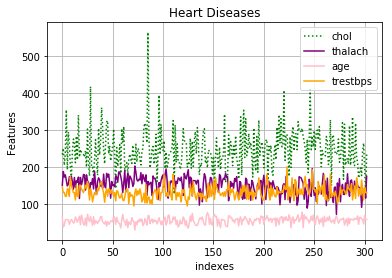

In [6]:
#We will practise how can we use 'lineplot'
data.chol.plot(kind="line",color="green",label="chol",grid=True,linestyle=":")
data.thalach.plot(kind="line",color="purple",label="thalach",grid=True)
data.age.plot(kind="line",color="pink",label="age",grid=True)
data.trestbps.plot(kind="line",color="orange",label="trestbps",grid=True)
plt.legend(loc="upper right") #legend: puts feature label into plot
plt.xlabel("indexes")
plt.ylabel("Features")
plt.title("Heart Diseases")
plt.show()

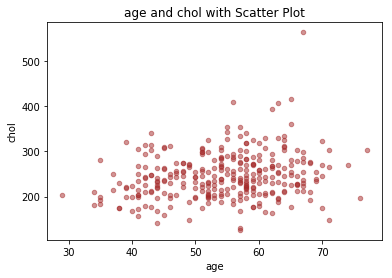

In [7]:
#We will practise how can we use Scatter Plot
#I want to compare 'age' and 'chol'. Is there any connection with these features?
data.plot(kind="scatter", x="age", y="chol", alpha= 0.5, color="brown")
plt.xlabel("age")
plt.ylabel("chol")
plt.title("age and chol with Scatter Plot")
plt.show()

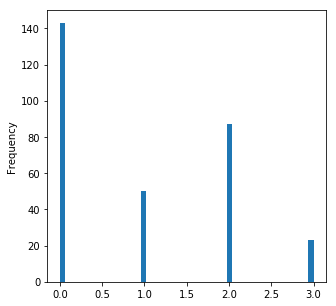

In [8]:
#Histogram shows frequency of feature to us.
data.cp.plot(kind="hist",bins=50,figsize=(5,5))
plt.show()

In [9]:
# My first filter -> logical and
data[(data['cp']>2) & (data['sex']<1)]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
14,58,0,3,150,283,1,0,162,0,1.0,2,0,2,1
17,66,0,3,150,226,0,1,114,0,2.6,0,0,2,1
19,69,0,3,140,239,0,1,151,0,1.8,2,2,2,1
147,60,0,3,150,240,0,1,171,0,0.9,2,0,2,1


In [10]:
# My second filter -> logical or
data[(data['age']>70) | (data['ca']>2)]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
25,71,0,1,160,302,0,1,162,0,0.4,2,2,2,1
52,62,1,2,130,231,0,1,146,0,1.8,1,3,3,1
60,71,0,2,110,265,1,0,130,0,0.0,2,1,2,1
92,52,1,2,138,223,0,1,169,0,0.0,2,4,2,1
97,52,1,0,108,233,1,1,147,0,0.1,2,3,3,1
99,53,1,2,130,246,1,0,173,0,0.0,2,3,2,1
129,74,0,1,120,269,0,0,121,1,0.2,2,1,2,1
144,76,0,2,140,197,0,2,116,0,1.1,1,0,2,1
151,71,0,0,112,149,0,1,125,0,1.6,1,0,2,1
158,58,1,1,125,220,0,1,144,0,0.4,1,4,3,1


In [11]:
# Lets think of every feature as a list. 
print(data.age[0])
print('')
# we can see all ages with enumerate
for index, value in enumerate(data.age[0:5]): 
   print(index," : ",value)
print('')
# other option is iterrows(). We can see 5 sexes with details.    
for index, value in data[['sex']][0:5].iterrows(): 
     print(index," : ",value)

63

0  :  63
1  :  37
2  :  41
3  :  56
4  :  57

0  :  sex    1
Name: 0, dtype: int64
1  :  sex    1
Name: 1, dtype: int64
2  :  sex    0
Name: 2, dtype: int64
3  :  sex    1
Name: 3, dtype: int64
4  :  sex    0
Name: 4, dtype: int64


In [12]:
#usage of tuble func.
i=3; #global  variable(scope)
def tuble_ex():
  # there is no local scope however 't' has 3 variables. Because we have global scope.
    t=(data.age[i],data.age[i+1],data.age[i+2])
    return t
a,b,c = tuble_ex() # 3 variables returned.
print(a,b,c)
print(tuble_ex())

56 57 57
(56, 57, 57)


In [13]:
#Nested func. practise with oldpeak and cp values. 
for i in range(6): 
    def square():
        def add(): 
            x= data.oldpeak[i]
            y= data.cp[i]
            z= x+y
            return z
        return add()**2
    if square() > 5 and square() < 10:
        print(square(),"Normal")
    else:
        print(square(),"Critical")

28.09 Critical
30.25 Critical
5.76 Normal
3.24 Critical
0.36 Critical
0.16000000000000003 Critical


In [14]:
#Map,Lambda,zip() practise
x= map(lambda k:k**2,data.sex[0:5])
y= map(lambda k:k,data.age[0:5])
#print(x,y)
list1= list(x)
list2= list(y)
z= zip(list1,list2)
z_list=list(z)
print(z_list)

[(1, 63), (1, 37), (0, 41), (1, 56), (0, 57)]


In [15]:
# I can find the average age of patients
# I want to create new section about probabilities according to ages.
threshold = sum(data.age)/len(data.age)
print("Threshold:",threshold)
#list comprehension
data["probability"]= ["high" if i>threshold else "low" for i in data.age]
data.loc[:10,["probability","age"]]

Threshold: 54.366336633663366


,probability,age
0,high,63
1,low,37
2,low,41
3,high,56
4,high,57
5,high,57
6,high,56
7,low,44
8,low,52
9,high,57


Cleaning Data ✨


In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 15 columns):
age            303 non-null int64
sex            303 non-null int64
cp             303 non-null int64
trestbps       303 non-null int64
chol           303 non-null int64
fbs            303 non-null int64
restecg        303 non-null int64
thalach        303 non-null int64
exang          303 non-null int64
oldpeak        303 non-null float64
slope          303 non-null int64
ca             303 non-null int64
thal           303 non-null int64
target         303 non-null int64
probability    303 non-null object
dtypes: float64(1), int64(13), object(1)
memory usage: 35.6+ KB


In [17]:
# I want to learn frequency of ages
print("age","frequency")
print(data.age.value_counts(dropna=False))

age frequency
58    19
57    17
54    16
59    14
52    13
51    12
62    11
44    11
60    11
56    11
64    10
41    10
63     9
67     9
55     8
45     8
42     8
53     8
61     8
65     8
43     8
66     7
50     7
48     7
46     7
49     5
47     5
39     4
35     4
68     4
70     4
40     3
71     3
69     3
38     3
34     2
37     2
77     1
76     1
74     1
29     1
Name: age, dtype: int64


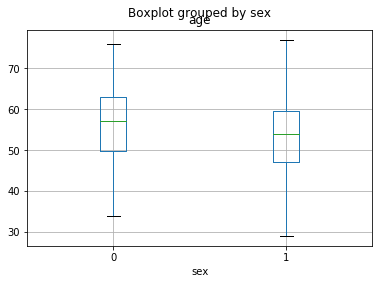

In [18]:
#If we want to find outlier datas, we should use describe() method.
#Its easier to see statistical calculations.
#Also its ignore null entries.
data.describe()
#We can see visualization of statistical calculations.
data.boxplot(column="age", by="sex")
# ages value by sex
plt.show()

As we can see on boxplot, we haven't got any outlier value. 💯

In [19]:
#Lets practise how can we melt of data_new.
data_new = data.head()
data_new

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,probability
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1,high
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1,low
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1,low
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1,high
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1,high


In [20]:
melted = pd.melt(frame=data_new,id_vars='age',value_vars=['restecg','exang'])
melted

,age,variable,value
0,63,restecg,0
1,37,restecg,1
2,41,restecg,0
3,56,restecg,1
4,57,restecg,1
5,63,exang,0
6,37,exang,0
7,41,exang,0
8,56,exang,0
9,57,exang,1


In [21]:
# rivot: reverse of melting
melted.pivot(index='age',columns='variable',values='value')

variable,exang,restecg
age,,
37,0,1
41,0,0
56,0,1
57,1,1
63,0,0


In [22]:
#How can we concatenate to dataframes?
data1= data.head()
data2= data.tail()
conc_data_row= pd.concat([data1,data2],axis=0,ignore_index=True) 
conc_data_row

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,probability
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1,high
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1,low
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1,low
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1,high
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1,high
5,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0,high
6,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0,low
7,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0,high
8,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0,high
9,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0,high


In [23]:
data1= data.sex.head()
data2= data.chol.head()
conc_data_col= pd.concat([data1,data2],axis=1) #axis=1: adds df in column
conc_data_col

,sex,chol
0,1,233
1,1,250
2,0,204
3,1,236
4,0,354


In [24]:
data.dtypes

age              int64
sex              int64
cp               int64
trestbps         int64
chol             int64
fbs              int64
restecg          int64
thalach          int64
exang            int64
oldpeak        float64
slope            int64
ca               int64
thal             int64
target           int64
probability     object
dtype: object

In [25]:
#I want to convert object to categorical and float to int.
data.probability= data.probability.astype('category')
data.oldpeak=data.oldpeak.astype('int')
data.dtypes

age               int64
sex               int64
cp                int64
trestbps          int64
chol              int64
fbs               int64
restecg           int64
thalach           int64
exang             int64
oldpeak           int64
slope             int64
ca                int64
thal              int64
target            int64
probability    category
dtype: object

In [26]:
#Lets find missing values. 
data.info()
#As we can see this dataframe hasn't got any null entry or missing value. What am I lucky!!!✔
#I think,this dataset has already been cleared but anyway..

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 15 columns):
age            303 non-null int64
sex            303 non-null int64
cp             303 non-null int64
trestbps       303 non-null int64
chol           303 non-null int64
fbs            303 non-null int64
restecg        303 non-null int64
thalach        303 non-null int64
exang          303 non-null int64
oldpeak        303 non-null int64
slope          303 non-null int64
ca             303 non-null int64
thal           303 non-null int64
target         303 non-null int64
probability    303 non-null category
dtypes: category(1), int64(14)
memory usage: 33.6 KB


In [27]:
# We can check lots of things with 'assert'
assert data.target.notnull().all()
#returns nothing it means we don't have any nan values.

In [28]:
assert data.slope.dtypes == np.int

In [29]:
# high level filter :d
filter1=data.thal>2
filter2= data.slope<1
data.age[filter1 & filter2]

101    59
103    42
169    53
171    48
195    59
204    62
221    55
223    56
225    70
269    56
Name: age, dtype: int64

In [30]:
#I just want to practise usage of plain python func.
def cross(n):
    return n*2
data["new"]= data.age.apply(cross)+data.cp
#data.new
data.loc[:5,"slope":]

,slope,ca,thal,target,probability,new
0,0,0,1,1,high,129
1,0,0,2,1,low,76
2,2,0,2,1,low,83
3,2,0,2,1,high,113
4,2,0,2,1,high,114
5,1,0,1,1,high,114


In [31]:
# Setting index: type1 is outer, type 2 is inner index
data1=data.set_index(["age","chol"])
data1.head(10)

sex  cp  trestbps  fbs ...   thal  target  probability  new
age chol                         ...                                 
63  233     1   3       145    1 ...      1       1         high  129
37  250     1   2       130    0 ...      2       1          low   76
41  204     0   1       130    0 ...      2       1          low   83
56  236     1   1       120    0 ...      2       1         high  113
57  354     0   0       120    0 ...      2       1         high  114
    192     1   0       140    0 ...      1       1         high  114
56  294     0   1       140    0 ...      2       1         high  113
44  263     1   1       120    0 ...      3       1          low   89
52  199     1   2       172    1 ...      3       1          low  106
57  168     1   2       150    0 ...      2       1         high  116

[10 rows x 14 columns]

In [32]:
# Lets group all features according to cp
data.groupby("cp").mean()
#data.groupby("cp").age.max()

,age,sex,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,new
cp,,,,,,,,,,,,,,
0,55.692308,0.727273,132.020979,250.132867,0.125874,0.475524,140.538462,0.559441,1.097902,1.258741,0.965035,2.447552,0.272727,111.384615
1,51.360000,0.640000,128.400000,244.780000,0.100000,0.620000,162.420000,0.080000,0.160000,1.680000,0.420000,2.140000,0.820000,103.720000
2,53.517241,0.597701,130.379310,243.172414,0.195402,0.597701,155.609195,0.126437,0.517241,1.505747,0.586207,2.206897,0.793103,109.034483
3,55.869565,0.826087,140.869565,237.130435,0.217391,0.391304,155.956522,0.173913,0.956522,1.260870,0.478261,2.260870,0.695652,114.739130


**Lets start to EDA! 🎊**

In [33]:
# How many patients fasting blood sugar is > 120 mg/dl? (true=1, false=0)
data.fbs.value_counts(dropna=False)

0    258
1     45
Name: fbs, dtype: int64

Text(0.5,1,'Most common ages of heart patients')

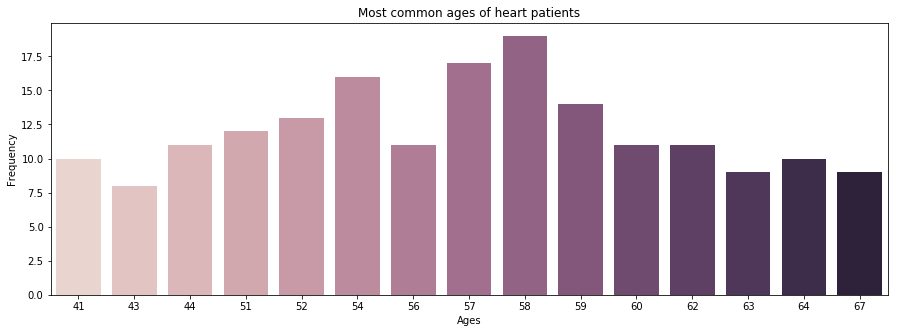

In [34]:
# Which age range is more likely to be a heart patient?
age_list= list(data.age)
# I am gonna use 'Counter' method. We should import it at the beginning.
age_count= Counter(age_list)
most_common_age= age_count.most_common(15)
x,y = zip(*most_common_age)
x,y = list(x), list(y)

#Visualization
plt.figure(figsize=(15,5))
sns.barplot(x=x, y=y, palette= sns.cubehelix_palette(len(x)))
plt.ylabel('Frequency')
plt.xlabel('Ages')
plt.title('Most common ages of heart patients')

In [35]:
# As we can see;
data.age.value_counts()

58    19
57    17
54    16
59    14
52    13
51    12
62    11
44    11
60    11
56    11
64    10
41    10
63     9
67     9
55     8
45     8
42     8
53     8
61     8
65     8
43     8
66     7
50     7
48     7
46     7
49     5
47     5
39     4
35     4
68     4
70     4
40     3
71     3
69     3
38     3
34     2
37     2
77     1
76     1
74     1
29     1
Name: age, dtype: int64

[Text(0,0.5,'Cp values'),
 Text(0.5,0,'Ages'),
 Text(0.5,1,'Type of heart attack by age')]

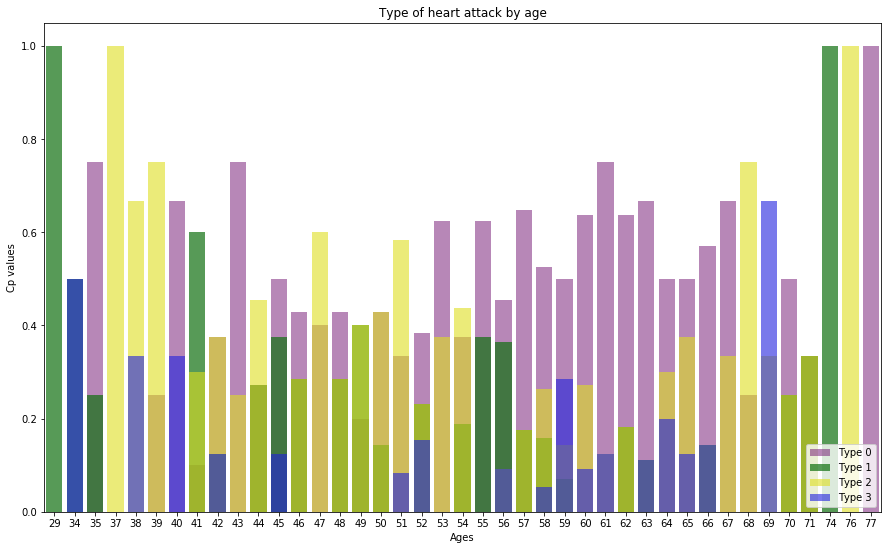

In [36]:
#Lets find type of heart attack by all ages. (cp values)
age_list=list(data.age.unique())
#cp_list= list(data.cp.unique())
cp_zero=[]
cp_one=[]
cp_two=[]
cp_three=[]
for i in age_list:
    x= data[data['age']==i]
    cp_zero.append(sum(x.cp==0)/len(x))
    cp_one.append(sum(x.cp==1)/len(x))
    cp_two.append(sum(x.cp==2)/len(x))
    cp_three.append(sum(x.cp==3)/len(x))
#Visualization
f,ax= plt.subplots(figsize=(15,9))
sns.barplot(y=cp_zero,x=age_list,color='purple',alpha=0.5,label='Type 0')
sns.barplot(y=cp_one,x=age_list,color='green',alpha=0.7,label='Type 1')
sns.barplot(y=cp_two,x=age_list,color='yellow',alpha=0.6,label='Type 2')
sns.barplot(y=cp_three,x=age_list,color='blue',alpha=0.6,label='Type 3')

ax.legend(loc='lower right',frameon=True)
ax.set(xlabel='Ages', ylabel='Cp values', title='Type of heart attack by age')

In [37]:
#As we can see;
data.loc[:20,["age","cp"]]

,age,cp
0,63,3
1,37,2
2,41,1
3,56,1
4,57,0
5,57,0
6,56,1
7,44,1
8,52,2
9,57,2


Lets compare
* age,
* chol (serum cholestoral in mg/dl),
* trestbps values (resting blood pressure)
and find the** correlation!**

In [38]:
#Sorted Chol values by age
age_list= list(data.age.unique())
chol_ratio=[]
for i in age_list:
    x=data[data['age']==i]
    chol_rate=sum(x.chol)/len(x)
    chol_ratio.append(chol_rate)
datac= pd.DataFrame({'age_list': age_list,'chol_ratio': chol_ratio})
new_index=(datac['chol_ratio'].sort_values(ascending=False)).index.values
sorted_data=datac.reindex(new_index)
sorted_data.head()

,age_list,chol_ratio
40,77,304.000000
34,67,286.777778
32,55,280.625000
22,65,279.000000
10,64,274.400000


In [39]:
#Sorted trestbps values by age
age_list= list(data.age.unique())
tbps_ratio=[]
for i in age_list:
    x=data[data['age']==i]
    tbps_rate=sum(x.trestbps)/len(x)
    tbps_ratio.append(tbps_rate)
datat= pd.DataFrame({'age_list': age_list,'tbps_ratio': tbps_ratio})
new_index=(datat['tbps_ratio'].sort_values(ascending=False)).index.values
sorted_data2=datat.reindex(new_index)
sorted_data2.head()

,age_list,tbps_ratio
16,59,149.214286
38,70,147.750000
15,69,146.666667
13,66,146.571429
32,55,142.125000


In [40]:
#We have values in two different ranges so I normalized them.
sorted_data['chol_ratio']=sorted_data['chol_ratio']/max(sorted_data['chol_ratio'])
sorted_data2['tbps_ratio']=sorted_data2['tbps_ratio']/max(sorted_data2['tbps_ratio'])
data_all=pd.concat([sorted_data,sorted_data2['tbps_ratio']],axis=1)
data_all.sort_values('chol_ratio',inplace=True)
data_all.head()

,age_list,chol_ratio,tbps_ratio
39,38,0.637061,0.884634
29,34,0.644737,0.790809
19,40,0.645833,0.898037
37,76,0.648026,0.938248
31,29,0.671053,0.871230


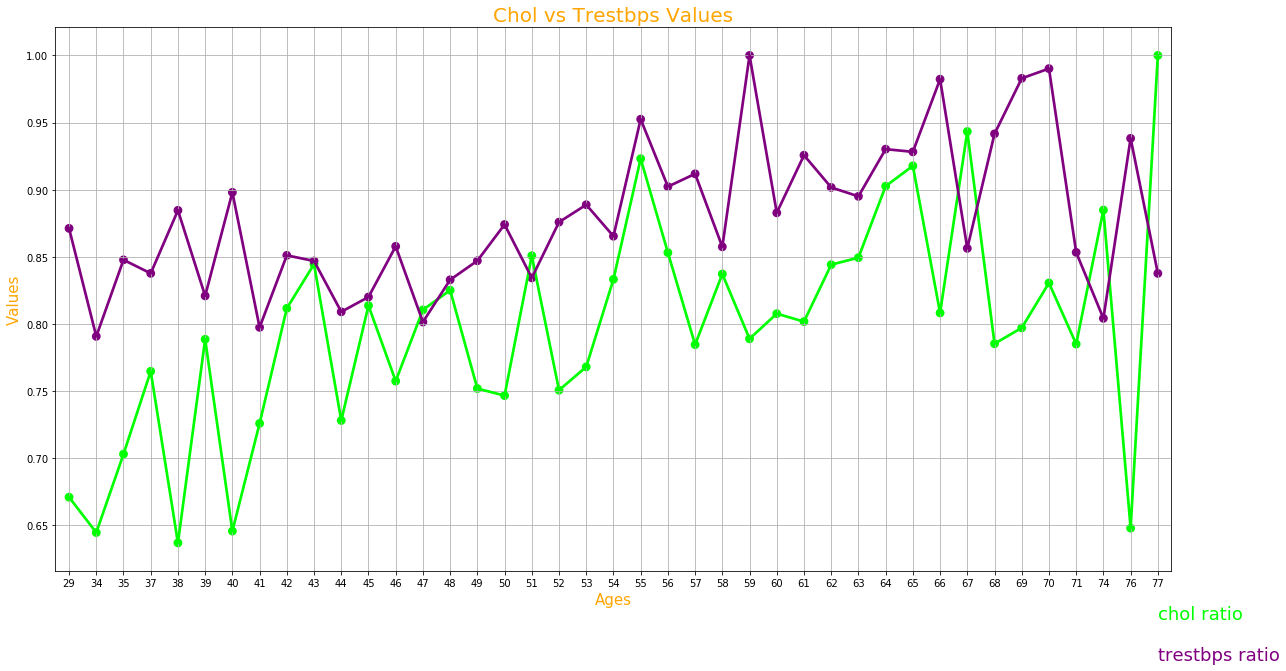

In [41]:
#Visualization with point plot
f,ax1 = plt.subplots(figsize=(20,10))
sns.pointplot(x=data_all['age_list'],y=data_all['chol_ratio'],data_all=data_all,color='lime',alpha=0.8)
sns.pointplot(x=data_all['age_list'],y=data_all['tbps_ratio'],data_all=data_all,color='purple',alpha=0.8)
plt.text(40,0.58,'chol ratio',color='lime',fontsize=18,style='normal')
plt.text(40,0.55,'trestbps ratio',color='purple',fontsize=18,style='normal')
plt.xlabel('Ages',fontsize=15,color='orange')
plt.ylabel('Values',fontsize=15,color='orange')
plt.title('Chol vs Trestbps Values',fontsize=20,color='orange')
plt.grid()

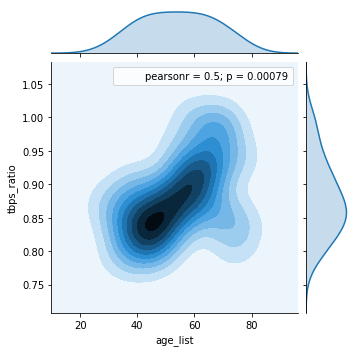

In [42]:
# Visualization with joint plot
from scipy import stats 
#I include it for see pearsonr value.
g= sns.jointplot(data_all['age_list'],data_all['tbps_ratio'],kind="kde",height=5)
g = g.annotate(stats.pearsonr)
plt.savefig('graph.png')
plt.show()

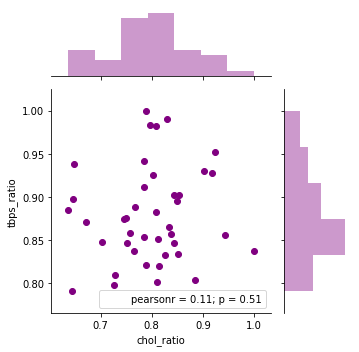

In [43]:
g= sns.jointplot(data_all.chol_ratio,data_all.tbps_ratio,height=5,ratio=3,color="purple")
g = g.annotate(stats.pearsonr)

In [44]:
data_all.head()

,age_list,chol_ratio,tbps_ratio
39,38,0.637061,0.884634
29,34,0.644737,0.790809
19,40,0.645833,0.898037
37,76,0.648026,0.938248
31,29,0.671053,0.871230


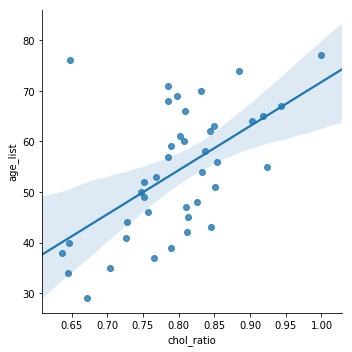

In [45]:
#Linear model
sns.lmplot(x="chol_ratio",y="age_list",data=data_all)
plt.show()

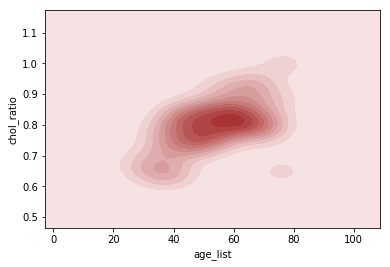

In [46]:
sns.kdeplot(data_all.age_list,data_all.chol_ratio,shade=True,cut=5,color="brown")
plt.show()

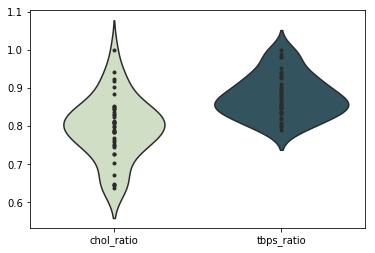

In [47]:
pal= sns.cubehelix_palette(2,rot=-.5,dark=.3)
sns.violinplot(data=data_all.loc[:,["chol_ratio","tbps_ratio"]],palette=pal,inner="points")
plt.show()
#It means the most value we have is about 0.8 for chol_ratio and the most value we have is between 0.8 and 0.9 for tbps_ratio. 

In [48]:
data_all.corr()
#As we can see; values of data_all are positive correlation so values are directly proportional.
#The similarity between chol and tbps value are very low.

,age_list,chol_ratio,tbps_ratio
age_list,1.000000,0.567632,0.503678
chol_ratio,0.567632,1.000000,0.106768
tbps_ratio,0.503678,0.106768,1.000000


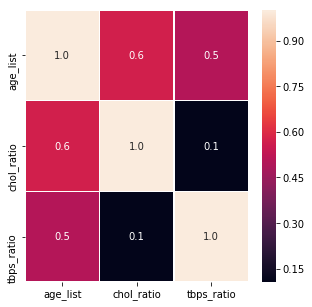

In [49]:
#Correlation map
f,ax= plt.subplots(figsize=(5,5))
sns.heatmap(data_all.corr(), annot=True, linewidths=.5, fmt='.1f', ax=ax)
plt.show()

Text(0.5,1,'Chest pain type(cp) according in heart.csv')

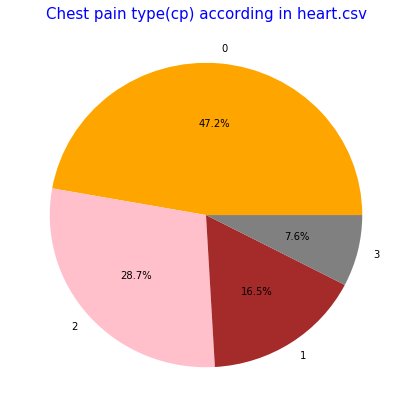

In [50]:
#I want to learn chest pain type (cp) according in heart data.
labels= data.cp.value_counts().index
colors=["orange","pink","brown","gray"]
explode= [0,0,0,0]
sizes=data.cp.value_counts().values
#Visualization with pie plot
plt.figure(figsize=(7,7))
plt.pie(sizes,explode=explode,labels=labels,colors=colors,autopct='%1.1f%%')
plt.title('Chest pain type(cp) according in heart.csv',color="blue",fontsize=15)

In [51]:
data.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,probability,new
0,63,1,3,145,233,1,0,150,0,2,0,0,1,1,high,129
1,37,1,2,130,250,0,1,187,0,3,0,0,2,1,low,76
2,41,0,1,130,204,0,0,172,0,1,2,0,2,1,low,83
3,56,1,1,120,236,0,1,178,0,0,2,0,2,1,high,113
4,57,0,0,120,354,0,1,163,1,0,2,0,2,1,high,114
5,57,1,0,140,192,0,1,148,0,0,1,0,1,1,high,114
6,56,0,1,140,294,0,0,153,0,1,1,0,2,1,high,113
7,44,1,1,120,263,0,1,173,0,0,2,0,3,1,low,89
8,52,1,2,172,199,1,1,162,0,0,2,0,3,1,low,106
9,57,1,2,150,168,0,1,174,0,1,2,0,2,1,high,116


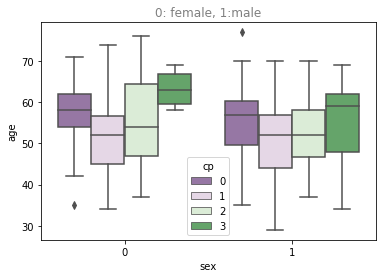

In [52]:
#I want to learn age, gender and chest pain type correlations.
sns.boxplot(x="sex", y="age", hue="cp", data=data, palette="PRGn")
plt.title("0: female, 1:male",color="gray")
plt.show()

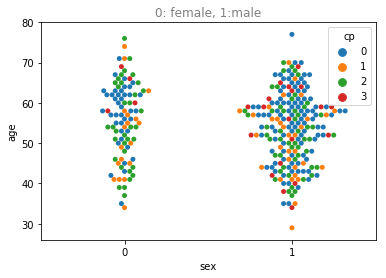

In [53]:
#Other option is;
sns.swarmplot(x="sex", y="age", hue="cp", data=data)
plt.title("0: female, 1:male",color="gray")
plt.show()

We can understand so many info with these plots. According to heart.csv;
* The most patients who are heart disease man.
* Heart patients are mostly in age from 50 to 60.
* chest pain type is mostly 2 in women whereas it is 0 in men and type 3 is common in men.

When we change features in func. we can find so many different info. about heart disease. 🎈

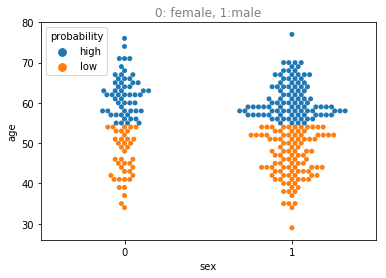

In [54]:
#I used swarmplot to learn about age,gender and the possibility of having heart disease.
sns.swarmplot(x="sex", y="age", hue="probability", data=data)
plt.title("0: female, 1:male",color="gray")
plt.show()

In [55]:
data.ca.value_counts()

0    175
1     65
2     38
3     20
4      5
Name: ca, dtype: int64

Text(0.5,1,'Ca values in data')

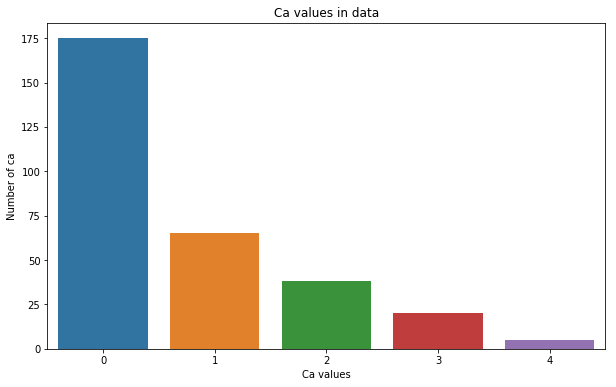

In [56]:
#Lets see "ca" value(number of major vessels (0-3) colored by flourosopy).
plt.figure(figsize=(10,6))
count= data.ca.value_counts()
sns.barplot(x=count.index, y=count.values)
plt.ylabel("Number of ca")
plt.xlabel("Ca values")
plt.title("Ca values in data", color="black", fontsize="12")

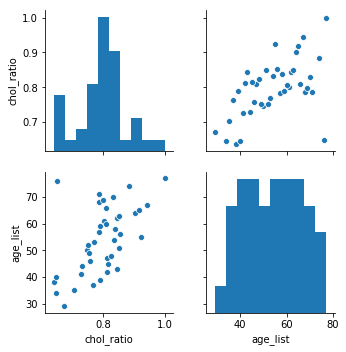

In [57]:
sns.pairplot(data_all.loc[:,["chol_ratio","age_list"]])
plt.show()

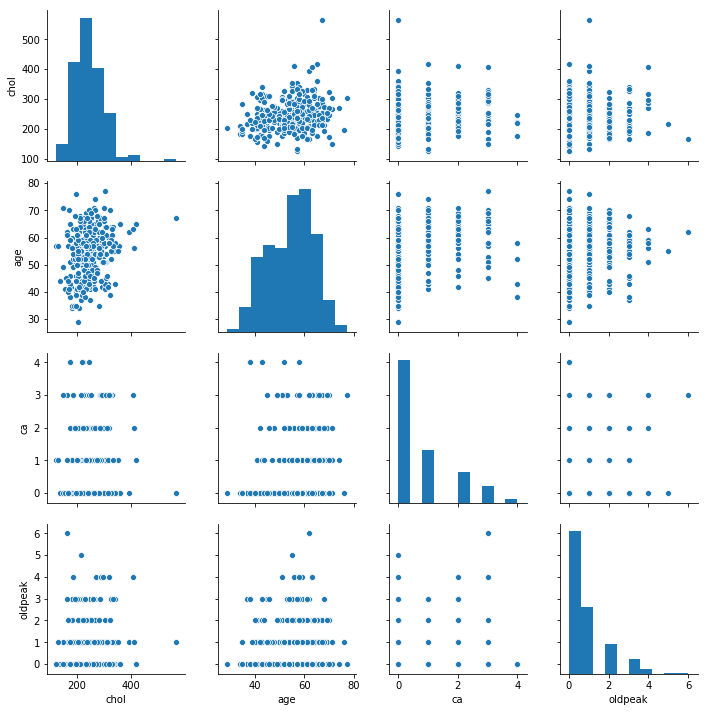

In [58]:
sns.pairplot(data.loc[:,["chol","age","ca","oldpeak"]])
plt.show()

.🎮🎮🎮